In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-dataset/validation.csv
/kaggle/input/emotion-dataset/training.csv
/kaggle/input/emotion-dataset/test.csv


In [3]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train = pd.read_csv('/kaggle/input/emotion-dataset/training.csv')
test = pd.read_csv('/kaggle/input/emotion-dataset/test.csv')
validation = pd.read_csv('/kaggle/input/emotion-dataset/validation.csv')


In [5]:
df_complete = pd.concat([train, test, validation], axis = 0)
df_complete.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
df_complete.to_csv("emotion_data.csv")

In [5]:
test[test.label == 5]

,text,label
65,i feel a little stunned but can t imagine what...,5
69,i feel shocked and sad at the fact that there ...,5
72,i am right handed however i play billiards lef...,5
152,i was so uncomfortable and feeling weird feeli...,5
222,i think i wanted audiences to feel impressed i...,5
...,...,...
1791,i did a body scan and realized that everything...,5
1797,i feel the pressure to be funny all the time,5
1911,im ok with that it feels a little weird,5
1925,i am still feeling a tad strange in those pear...,5


In [6]:
labels_dict = {0:"sadness", 1:"joy", 2:"love", 3:"anger", 4: "fear", 5: "suprise"}
df_complete["emotions"] = df_complete['label'].map(labels_dict)
df_complete.head()

,text,label,emotions
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [7]:
df_complete.shape

(20000, 3)

### Convert to Lowercase

In [8]:
df_complete.text = df_complete.text.str.lower()
df_complete.head()

,text,label,emotions
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Removal of punctuations

In [9]:
 def remove_punctuations(text):
        punctuations = string.punctuation
        return text.translate(str.maketrans("", '', punctuations))
        

In [10]:
df_complete.text = df_complete.text.apply(lambda x: remove_punctuations(x))

### Remove stopwords

In [11]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])


In [13]:
df_complete['text'] = df_complete['text'].apply(lambda x: remove_stopwords(x))

### Removal of Irrelevant frequent words

In [14]:
from collections import Counter
word_count = Counter()
for text in df_complete['text']:
    for word in text.split():
        word_count[word] +=1

# Get the top 10 most common words 
word_count.most_common(10)

[('feel', 13938),
 ('feeling', 6431),
 ('like', 3616),
 ('im', 3055),
 ('really', 1182),
 ('know', 1080),
 ('time', 993),
 ('little', 932),
 ('get', 926),
 ('people', 839)]

We can see the top 10 most frequent words but only feel and feelings seem most important becasue we are dealing with emotions, so lets remove all but first two.

In [15]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(10)[2:])
def remove_frequent(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

In [16]:
FREQUENT_WORDS

{'get', 'im', 'know', 'like', 'little', 'people', 'really', 'time'}

In [17]:
df_complete['clean_text'] = df_complete['text'].apply(lambda x: remove_frequent(x))

In [18]:
df_complete.head()

,text,label,emotions,clean_text
0,didnt feel humiliated,0,sadness,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...,0,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong,3,anger,grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...,2,love,ever feeling nostalgic fireplace still property
4,feeling grouchy,3,anger,feeling grouchy


### Removal of Rare words

In [19]:
Rare_words = set((word, wc) for (word,wc) in word_count.most_common()[:-10:-1])
Rare_words

{('dams', 1),
 ('inclusion', 1),
 ('internalize', 1),
 ('jrock', 1),
 ('objectively', 1),
 ('rye', 1),
 ('ssa', 1),
 ('textbook', 1),
 ('tommorrow', 1)}

In [20]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in Rare_words])

In [21]:
df_complete['clean_text'] = df_complete['clean_text'].apply(lambda x: remove_rare_words(x))

In [22]:
df_complete.head()

,text,label,emotions,clean_text
0,didnt feel humiliated,0,sadness,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...,0,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong,3,anger,grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...,2,love,ever feeling nostalgic fireplace still property
4,feeling grouchy,3,anger,feeling grouchy


### Stemming

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [24]:
df_complete['stemmed_text'] = df_complete['clean_text'].apply(lambda x: stem_words(x))

In [25]:
df_complete.head()

,text,label,emotions,clean_text,stemmed_text
0,didnt feel humiliated,0,sadness,didnt feel humiliated,didnt feel humili
1,go feeling hopeless damned hopeful around some...,0,sadness,go feeling hopeless damned hopeful around some...,go feel hopeless damn hope around someon care ...
2,im grabbing minute post feel greedy wrong,3,anger,grabbing minute post feel greedy wrong,grab minut post feel greedi wrong
3,ever feeling nostalgic fireplace know still pr...,2,love,ever feeling nostalgic fireplace still property,ever feel nostalg fireplac still properti
4,feeling grouchy,3,anger,feeling grouchy,feel grouchi


### Lemmatization

In [26]:
import spacy

eng = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    # Process the review text using spaCy
    doc = eng(text)
    
    # Lemmatize each token and join them back into a string
    lemmatized_words = [token.lemma_ for token in doc]
    
    # Join the lemmatized words to form the lemmatized review
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

In [27]:
df_complete['lemmatized_text'] = df_complete['clean_text'].apply(lemmatize_text)


In [28]:
df_complete.head()

,text,label,emotions,clean_text,stemmed_text,lemmatized_text
0,didnt feel humiliated,0,sadness,didnt feel humiliated,didnt feel humili,do not feel humiliate
1,go feeling hopeless damned hopeful around some...,0,sadness,go feeling hopeless damned hopeful around some...,go feel hopeless damn hope around someon care ...,go feel hopeless damned hopeful around someone...
2,im grabbing minute post feel greedy wrong,3,anger,grabbing minute post feel greedy wrong,grab minut post feel greedi wrong,grab minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...,2,love,ever feeling nostalgic fireplace still property,ever feel nostalg fireplac still properti,ever feel nostalgic fireplace still property
4,feeling grouchy,3,anger,feeling grouchy,feel grouchi,feel grouchy


In [29]:
df_complete = df_complete.drop(['text', 'clean_text', 'stemmed_text'], axis = 1)
df_complete.head()

,label,emotions,lemmatized_text
0,0,sadness,do not feel humiliate
1,0,sadness,go feel hopeless damned hopeful around someone...
2,3,anger,grab minute post feel greedy wrong
3,2,love,ever feel nostalgic fireplace still property
4,3,anger,feel grouchy


### Count Vectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = df_complete['lemmatized_text']  # Features
y = df_complete['label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a Count Vectorizer instance
vectorizer = CountVectorizer()

# Step 4: Fit and transform the training text data
X_train_count = vectorizer.fit_transform(X_train)

# Step 5: Transform the test text data using the same vectorizer
X_test_count = vectorizer.transform(X_test)

In [31]:
y_train.value_counts()

label
1    5422
0    4624
3    2173
4    1915
2    1306
5     560
Name: count, dtype: int64

### Model Building

#### Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count, y_train)

# Step 7: Make predictions on the test data
y_pred = nb_classifier.predict(X_test_count)

# Step 8: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7835
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1173
           1       0.75      0.95      0.84      1339
           2       0.90      0.35      0.50       335
           3       0.91      0.66      0.77       536
           4       0.82      0.62      0.71       458
           5       1.00      0.09      0.17       159

    accuracy                           0.78      4000
   macro avg       0.86      0.60      0.64      4000
weighted avg       0.81      0.78      0.76      4000



#### Ranadom Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_count, y_train)

# Step 7: Make predictions on the test data
y_pred = rf_classifier.predict(X_test_count)

# Step 8: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.86375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1173
           1       0.89      0.90      0.89      1339
           2       0.76      0.74      0.75       335
           3       0.85      0.88      0.86       536
           4       0.81      0.79      0.80       458
           5       0.71      0.79      0.75       159

    accuracy                           0.86      4000
   macro avg       0.82      0.83      0.83      4000
weighted avg       0.86      0.86      0.86      4000



#### XGBoost Classifier

In [34]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=500, random_state=42)
xgb_classifier.fit(X_train_count, y_train)

# Step 7: Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_count)

# Step 8: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.889
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1173
           1       0.90      0.92      0.91      1339
           2       0.79      0.79      0.79       335
           3       0.89      0.88      0.88       536
           4       0.84      0.85      0.85       458
           5       0.79      0.76      0.77       159

    accuracy                           0.89      4000
   macro avg       0.86      0.85      0.85      4000
weighted avg       0.89      0.89      0.89      4000



#### Confusion matrix of Best model

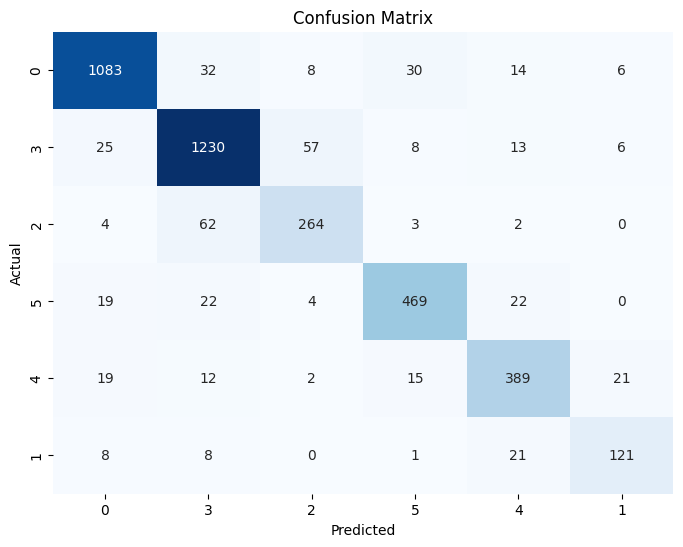

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


labels = df_complete['label'].unique()
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Save our model and preprocessing components

In [36]:
import joblib
# Save the XGB classifier
joblib.dump(xgb_classifier, 'model.pkl')
# Save the punctuaution removal component
joblib.dump(remove_punctuations, 'punctuation_removal.pkl')
# Save the stopwords removal component
joblib.dump(remove_stopwords, 'stopword_removal.pkl')
# Save the Lemmatization  component
joblib.dump(lemmatize_text, 'lemmatization.pkl')
# Save the count vectorizer component
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [37]:
model = joblib.load('model.pkl')
punc_removal = joblib.load('punctuation_removal.pkl')
stopwords_removal = joblib.load('stopword_removal.pkl')
lemmatizer = joblib.load('lemmatization.pkl')
vecktorizer = joblib.load('vectorizer.pkl')

In [38]:
texts = ["I feel stunned.", "I am so pissed"]

# Preprocess the input texts
preprocessed_texts = []

for text in texts:
    text = text.lower()
    text = punc_removal(text)
    text = stopwords_removal(text)
    text = lemmatizer(text)
    preprocessed_texts.append(text)

# Vectorize the preprocessed texts
text_vectorized = vectorizer.transform(preprocessed_texts)

# Predict using the loaded model
predicted_emotions = model.predict(text_vectorized)

# Define emotion labels
emotion_labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# Get the predicted emotion labels for each text
predicted_labels = [emotion_labels[predicted_class_index] for predicted_class_index in predicted_emotions]

# Print the predicted emotion labels for each text
for i, text in enumerate(texts):
    print(f"Text {i+1}: {text} - Predicted Emotion: {predicted_labels[i]}")

Text 1: I feel stunned. - Predicted Emotion: surprise
Text 2: I am so pissed - Predicted Emotion: anger


In [39]:
text = ["I hate snakes"]
text = [t.lower() for t in text]
text = [punc_removal(t) for t in text]
text = [stopwords_removal(t) for t in text]
text = [lemmatizer(t) for t in text]


In [40]:
# Vectorize the preprocessed text
text_vectorized = vectorizer.transform(text)

In [41]:
# Predict using the loaded model
predicted_emotion = model.predict(text_vectorized)

if predicted_emotion == 0:
    predicted_label = "sadness"
elif predicted_emotion == 1:
    predicted_label = "joy"
elif predicted_emotion == 2:
    predicted_label = "love"
elif predicted_emotion == 3:
    predicted_label = "anger"
elif predicted_emotion == 4:
    predicted_label = "fear"
else:
    predicted_label = "surprise"

print("Predicted Emotion:", predicted_label)


Predicted Emotion: anger


### Balancing the Classes and Using TF-IDF for vectorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data using TF-IDF vectorization
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [44]:
from imblearn.over_sampling import SMOTE
# Create an oversampler to balance the dataset
sm = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the training data to balance the classes
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_tfidf, y_train)


### Create an XGBoost classifier

In [45]:
xgb_classifier = XGBClassifier(n_estimators=500, random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Step 7: Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.883
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1173
           1       0.90      0.91      0.91      1339
           2       0.76      0.81      0.79       335
           3       0.88      0.89      0.88       536
           4       0.83      0.85      0.84       458
           5       0.78      0.75      0.77       159

    accuracy                           0.88      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.88      0.88      0.88      4000



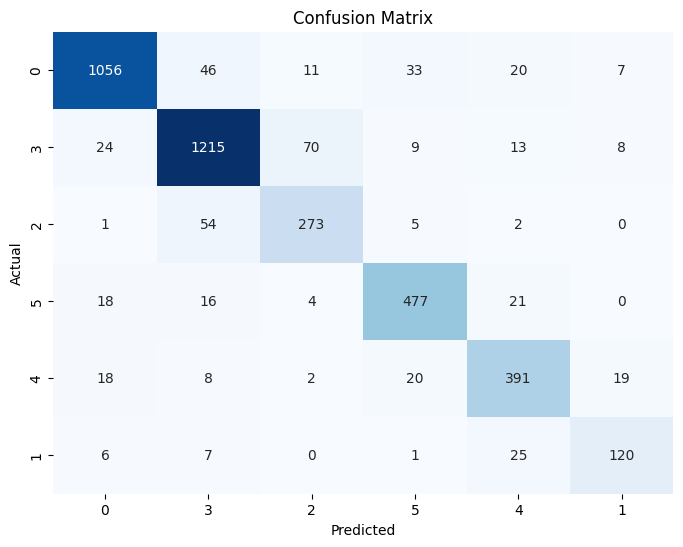

In [46]:
labels = df_complete['label'].unique()
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
texts = ["What a gift.", "I am so angry"]

# Preprocess the input texts
preprocessed_texts = []

for text in texts:
    text = text.lower()
    text = punc_removal(text)
    text = stopwords_removal(text)
    text = lemmatizer(text)
    preprocessed_texts.append(text)

# Vectorize the preprocessed texts
text_vectorized = vectorizer.transform(preprocessed_texts)

# Predict using the loaded model
predicted_emotions = model.predict(text_vectorized)

# Define emotion labels
emotion_labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# Get the predicted emotion labels for each text
predicted_labels = [emotion_labels[predicted_class_index] for predicted_class_index in predicted_emotions]

# Print the predicted emotion labels for each text
for i, text in enumerate(texts):
    print(f"Text {i+1}: {text} - Predicted Emotion: {predicted_labels[i]}")

Text 1: What a gift. - Predicted Emotion: anger
Text 2: I am so angry - Predicted Emotion: anger


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train)

# Step 7: Make predictions on the test data
y_pred = rf_classifier.predict(X_test_count)

# Step 8: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)